# Stock Market Data

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt 
%matplotlib inline

### Load environment variables and import Alpaca keys

In [2]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

### Setup REST object

In [4]:
# Create an Alpaca API REST object by calling the tradeapi.REST function
# Set the parameters to alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Use the Alpaca SDK to make an API call

In [5]:
# Create a list of tickers for traditional (non-crypto) securities
tickers = ["DIA", "NDAQ", "SPY"]

In [6]:
# Use the datetime library (datetime and timedelta) to pull 2 years worth of data from today's date
trading_days = 365
delta = timedelta(days = trading_days*2)

# Set start and end dates for data collection
end_date = datetime.now()
start_date = end_date - delta

# Set to ISO format
start_date = pd.Timestamp(start_date, tz="America/New_York").isoformat()
end_date = pd.Timestamp(end_date, tz="America/New_York").isoformat()

In [7]:
# Set timeframe to one day (1D)
timeframe = "1D"

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [8]:
# Use the Alpaca get_barset function to gather the price information for each ticker
stock_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = limit_rows
).df

# Keep only the date component of the DateTime index
stock_prices.index = stock_prices.index.date

# Review the first five rows of the resulting DataFrame 
display(stock_prices.head())
display(stock_prices.tail())

DIA                                          NDAQ          \
                open      high       low     close   volume   open    high   
2019-10-10  263.2300  266.0289  263.1100  265.0500  1970219  97.37  98.910   
2019-10-11  267.7699  270.1400  267.6200  268.0800  3904429  99.75  99.830   
2019-10-14  267.6000  268.7300  267.4352  267.8465  1135457  99.38  99.660   
2019-10-15  269.1200  271.1900  268.8600  270.2300  3065569  98.58  99.015   
2019-10-16  269.7900  270.5600  269.4000  270.0700  2321552  97.61  98.240   

                                      SPY                                      
              low  close   volume    open    high       low   close    volume  
2019-10-10  97.02  98.54   899830  291.18  294.21  291.0100  293.24  47899423  
2019-10-11  98.24  99.30  1322396  296.27  298.74  296.1448  296.26  78269814  
2019-10-14  98.24  98.32   569379  295.93  296.67  295.5700  296.01  31580316  
2019-10-15  97.78  97.91   902441  297.10  299.70  296.9700  298.90  38687211  
2019-10-16  96.43  98.10   802624  298.37  299.16  297.9200  298.41  40929771

DIA                                       NDAQ            \
              open      high     low   close   volume    open      high   
2021-10-04  342.64  344.0300  338.07  340.00  6743957  193.05  195.3300   
2021-10-05  341.15  344.8700  340.47  343.14  3709903  189.42  195.5800   
2021-10-06  340.48  344.2999  338.47  344.16  5949679  193.99  195.9000   
2021-10-07  346.87  349.7699  346.77  347.63  4980776  196.00  199.0900   
2021-10-08  347.91  348.4600  346.58  347.53  3484394  198.00  199.1499   

                                       SPY                            \
               low   close  volume    open      high     low   close   
2021-10-04  188.74  188.94  892987  433.00  433.9600  426.36  428.69   
2021-10-05  189.26  195.26  879657  430.24  435.4900  429.39  433.05   
2021-10-06  192.30  194.58  833930  429.27  435.1199  427.54  434.92   
2021-10-07  196.00  197.91  525688  438.39  441.6800  438.20  438.64   
2021-10-08  196.53  197.51  459981  439.48  439.8900  437.19  437.82   

                       
               volume  
2021-10-04  112134374  
2021-10-05   82381830  
2021-10-06   99477866  
2021-10-07   64139858  
2021-10-08   57510090

### Separate into individual DataFrames that contain only close prices

Dow Jones Industrial Average (DIA)

In [9]:
# Create DataFrame for DIA stock index
dia_prices = stock_prices["DIA"]

# Keep only the close prices and volume
dia_df = dia_prices.drop(columns = ["open", "high", "low"])


# Normalize all metrics by dividing volume by 20,000
dia_df["volume"] = dia_df["volume"] / 20000

# Display first 5 rows
dia_df.head()

,close,volume
2019-10-10,265.0500,98.51095
2019-10-11,268.0800,195.22145
2019-10-14,267.8465,56.77285
2019-10-15,270.2300,153.27845
2019-10-16,270.0700,116.07760


Nasdaq (NDAQ)

In [10]:
# Create DataFrame for NDAQ stock index
ndaq_prices = stock_prices["NDAQ"]

# Keep only the close prices and volume
ndaq_df = ndaq_prices.drop(columns = ["open", "high", "low"])

# Normalize all metrics by dividing volume by 10,000
ndaq_df["volume"] = ndaq_df["volume"] / 10000

# Display first 5 rows
ndaq_df.head()

,close,volume
2019-10-10,98.54,89.9830
2019-10-11,99.30,132.2396
2019-10-14,98.32,56.9379
2019-10-15,97.91,90.2441
2019-10-16,98.10,80.2624


S&P 500 (SPY)

In [11]:
# Create DataFrame for SPY stock index
spy_prices = stock_prices["SPY"]

# Keep only the close prices and volume
spy_df = spy_prices.drop(columns = ["open", "high", "low"])

# Normalize all metrics by dividing volume by 350,000
spy_df["volume"] = spy_df["volume"] / 350000

# Display first 5 rows
spy_df.head()

,close,volume
2019-10-10,293.24,136.855494
2019-10-11,296.26,223.628040
2019-10-14,296.01,90.229474
2019-10-15,298.90,110.534889
2019-10-16,298.41,116.942203


### BOLLINGER BAND STRATEGY

In [12]:
# Create a function that generates custom DataFrames of Bollinger Band metrics (close, sma, lower, upper, volume)
def bollinger(data, window):
    # Create the DataFrame
    bollinger_df = pd.DataFrame()
    
    # Add columns to display close prices and volume from called data
    bollinger_df["close"] = data["close"]
    bollinger_df["volume"] = data["volume"]
    
    # Use the Pandas 'rolling' and 'mean' functions to calculate an SMA based on a given window
    # Add the data to a column called 'sma'
    sma = data["close"].rolling(window = window).mean()
    bollinger_df["sma"] = sma
    
    # Use the Pandas 'rolling' and 'std' functions to calculate a rolling std based on a given window
    # Add the respective data to columns 'lower' and 'upper'  
    std = data["close"].rolling(window = window).std()
    bollinger_df["lower"] = sma - std * 2
    bollinger_df["upper"] = sma + std * 2
    
    print(f"Data is based on a {window}-day SMA.")
    
    return bollinger_df

In [13]:
# Generate a Bollinger Band DataFrame for SPY. Play around with differetn values for 'window'.
spy_bb = bollinger(spy_df, 20)

# Display DataFrame
display(spy_bb.head())
display(spy_bb.tail())

Data is based on a 20-day SMA.


,close,volume,sma,lower,upper
2019-10-10,293.24,136.855494,NaN,NaN,NaN
2019-10-11,296.26,223.628040,NaN,NaN,NaN
2019-10-14,296.01,90.229474,NaN,NaN,NaN
2019-10-15,298.90,110.534889,NaN,NaN,NaN
2019-10-16,298.41,116.942203,NaN,NaN,NaN


,close,volume,sma,lower,upper
2021-10-04,428.69,320.383926,440.9805,426.612851,455.348149
2021-10-05,433.05,235.376657,440.0570,426.175592,453.938408
2021-10-06,434.92,284.222474,439.2550,426.196885,452.313115
2021-10-07,438.64,183.256737,438.7400,426.503576,450.976424
2021-10-08,437.82,164.314543,438.3560,426.537927,450.174073


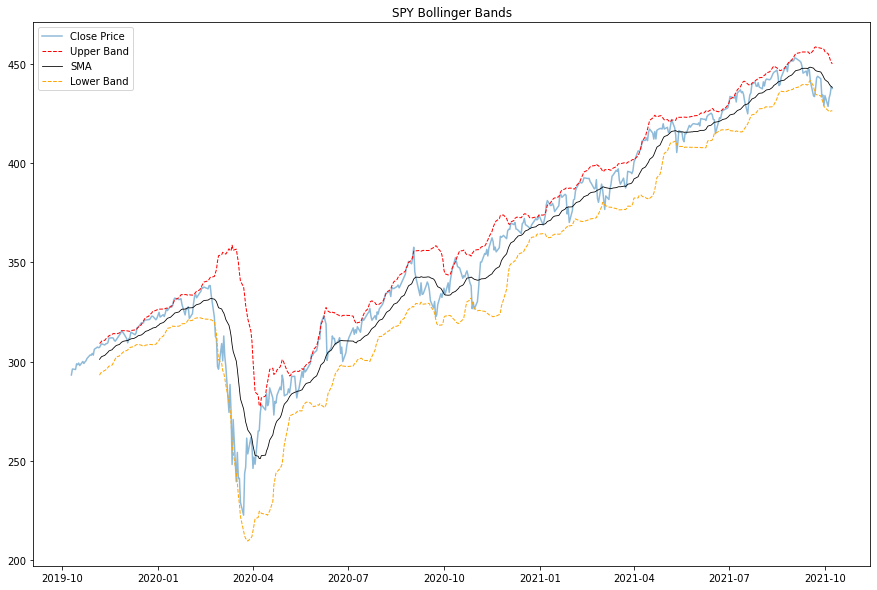

In [14]:
# Plot the DataFrame to visualize the SMA and Bollinger Bands using axes objects (ax=ax)
ax = spy_bb["close"].plot(
    figsize = (15,10),
    title = "SPY Bollinger Bands",
    alpha = 0.5, 
    linewidth = 1.5
)

# Overlay each column as a separate line on the same plot
spy_bb["upper"].plot(ax=ax, linestyle = "--", linewidth = 1, color = "red")
spy_bb["sma"].plot(ax=ax, linestyle = "-", linewidth = .8, color = "black")
spy_bb["lower"].plot(ax=ax, linestyle = "--", linewidth = 1, color = "orange")
#spy_bb["volume"].plot(ax=ax)

# Call the legend for the plot
ax.legend(["Close Price", "Upper Band", "SMA", "Lower Band"])


In [15]:
# # Generate a Bollinger Band DataFrame for NDAQ. Play around with differetn values for 'window'.
# ndaq_bb = bollinger(ndaq_df, 20)

# # Display DataFrame
# ndaq_bb

In [16]:
# # Plot the DataFrame to visualize the SMA and Bollinger Bands
# ndaq_bb.plot(figsize=(25,10))

In [17]:
# # Generate a Bollinger Band DataFrame for NDAQ. Play around with differetn values for 'window'.
# dia_bb = bollinger(dia_df, 20)

# # Display DataFrame
# dia_bb

In [18]:
# # Plot the DataFrame to visualize the SMA and Bollinger Bands
# dia_bb.plot(figsize=(25,10))

In [19]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

In [20]:
buy_price, sell_price, bb_signal = implement_bb_strategy(spy_bb["close"], spy_bb["lower"], spy_bb["upper"])

strategy_df = pd.DataFrame()
strategy_df["close"] = spy_bb["close"]

strategy_df["buy_price"] = buy_price
strategy_df["sell_price"] = sell_price
strategy_df["bb_signal"] = bb_signal

display(strategy_df.head())
display(strategy_df.tail())

,close,buy_price,sell_price,bb_signal
2019-10-10,293.24,NaN,NaN,0
2019-10-11,296.26,NaN,NaN,0
2019-10-14,296.01,NaN,NaN,0
2019-10-15,298.90,NaN,NaN,0
2019-10-16,298.41,NaN,NaN,0


,close,buy_price,sell_price,bb_signal
2021-10-04,428.69,NaN,NaN,0
2021-10-05,433.05,NaN,NaN,0
2021-10-06,434.92,NaN,NaN,0
2021-10-07,438.64,NaN,NaN,0
2021-10-08,437.82,NaN,NaN,0


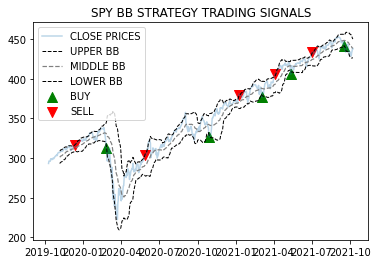

<Figure size 1800x720 with 0 Axes>

In [21]:
spy_bb['close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
spy_bb['upper'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
spy_bb['sma'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
spy_bb['lower'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')

plt.scatter(spy_bb.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 100)
plt.scatter(spy_bb.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 100)
plt.title('SPY BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')

plt.figure(figsize=(25,10))

plt.show()